#  Redistributor_multi examples

In this notebook, you can find examples on usage the Redistributor_multi class.
This class gives you the power to apply multiple Redistributor objects at once on different slices of one input matrix. Makes use of parallelizm and has low memory footprint.

In [2]:
%matplotlib inline
import numpy as np
from redistributor import Redistributor
from redistributor import Redistributor_multi

# CONFIG
GB = 1  # Size of training data
bbox = (0, 1)  # Bbox of training data
nsub = (1, 100, 5)  # Definition of matrix split (500 different subarrays)
cpus = 0  # Set the number of cpus automatically
params = {'bbox': bbox, 'validate_input': False}

# Random training data
x = np.random.rand(int(6250*GB), 100, 200)  
c = x.copy()  # For validation of inverse_transform

# Creating 500 redistributor objects, one for each subarray
redistributors = np.array([Redistributor(**params) for i in range(np.prod(nsub))]).reshape(nsub)

# Wrapping all redistributors in one Redistributor_multi
rm = Redistributor_multi(redistributors, nsub, cpus=cpus)

# Fitting
rm.fit(x)
print('Fitted.')

# Transforming inplace
rm.transform(x, inplace=True)
print('Transformed')

# Inverse transform inplace
rm.inverse_transform(x, inplace=True)
print('Inverse transformed.')

print('Inverse transform works: {}'.format(np.allclose(x, c)))

Fitted.
Transformed
Inverse transformed.
Inverse transform works: True


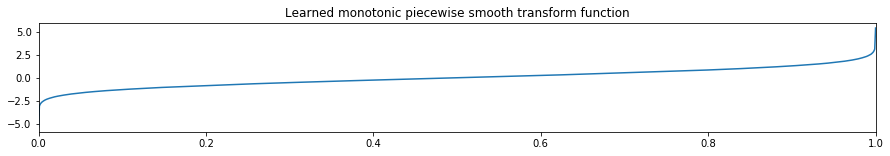

In [5]:
# Accessing the wrapped Redistributor objects (for examle on index [0,50,1])
rm.redistributors[0,50,1].plot_transform_function()